## Create Latitude and Longitude Combinations

In [6]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In the next cell, we'll add the code that generates the latitudes and longitudes, but first, they need to be stored so that we can access them later. Since we are creating arrays of latitudes and longitudes, we'll declare each array as a variable.

In the next cell, add the following code that we used to generate the random latitudes. Also, we'll create a similar code snippet that will generate longitudes. To ensure enough latitudes and longitudes, we'll start with 1,500. In addition, we'll pack the latitudes (lats) and longitudes (lngs) as pairs by zipping them (lat_lngs) with the zip() function.

In [7]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

The zip object packs each pair of lats and lngs having the same index in their respective array into a tuple. If there are 1,500 latitudes and longitudes, there will be 1,500 tuples of paired latitudes and longitudes, where each latitude and longitude in a tuple can be accessed by the index of 0 and 1, respectively.

Next, let's unpack our lat_lngs zip object into a list. This way, we only need to create a set of random latitudes and longitudes once. In a new cell in the WeatherPy.ipynb file, add the following code and run the cell.

In [8]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

NOTE You can only unzip a zipped tuple once before it is removed from the computer's memory. Make sure you unzip the latitudes and longitudes into the coordinates list before moving on.

https://github.com/wingchen/citipy

Select the README.md file on the citipy GitHub page for an example of how to use citipy to locate the nearest city and its country code from a pair of latitude and longitude coordinates.
Under "Looking up with coordinates," the first line says from citipy import citipy, meaning we'll import the citipy script from the citipy module.

NOTE When a Python file containing a script is imported to use in another Python script, the .py extension does not need to be added to the name of the file when using the import statement.

to get a city and country code from the citipy module,

In a new cell, create a for loop that will do the following:

1. Iterate through the coordinates' unzipped tuple.
2. Use citipy.nearest_city() and inside the parentheses of nearest_city(), add the latitude and longitude in this format: coordinate[0], coordinate[1].
3. To print the city name, chain the city_name to the nearest_city() function.
4. To print the country name, chain the country_code to the nearest_city() function.

Now that we are familiar with using the citipy module, we can iterate through our zipped lat_lngs tuple and find the nearest city. When we find a city, we'll need to add it to a list so that we can use the cities to get the weather data.

First, import the citipy module 

In [9]:
from citipy import citipy

In [10]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

595

Some of this code should look familiar, but let's break it down:

1. We create a cities list to store city names.
2. We iterate through the coordinates, as in our practice, and retrieve the nearest city using the latitude and longitude pair.
3. We add a decision statement with the logical operator not in to determine whether the found city is already in the cities list. If not, then we'll use the append() function to add it. We are doing this because among the 1,500 latitudes and longitudes, there might be duplicates, which will retrieve duplicate cities, and we want to be sure we capture only the unique cities.

NOTE
The citipy module finds the nearest city to the latitude and longitude pair with a population of 500 or more.

FINDING
When you run the code block, you should get slightly more than 500 unique cities. If you get fewer than 500, increase your size limit on the np.random.uniform() function.

### API Key:

Save your API key to a Python file, which we'll add as a dependency to your WeatherPy.ipynb file.

Navigate to your World_Weather_Analysis folder and launch Jupyter Notebook.
Click the New button and select Text File.
Rename the text file config.py.
On the first line, type weather_api_key="" and add your API key between the double quotation marks.
Save and close the config.py file.

NOTE
You can also create the config.py file using VS Code.

IMPORTANT
Don't share your API key with anyone, and do not add the config.py file to your GitHub repository–someone might copy and use it, and you could incur charges on your credit card.

#### Get the City Weather Data

Let's use pseudocode to map out, at a high level, how we will get the weather data for each city for the website.

We will need to do the following:

1. Import our dependencies and initialize counters and an empty list that will hold the weather data.
2. Loop through the cities list.
3. Group the cities in sets of 50 to log the process as we find the weather data for each city.
    - Two counters will be needed here: one to log the city count from 1 to 50, and another for the sets.
4. Build the city_url or endpoint for each city.
5. Log the URL and the record and set numbers.
6. Make an API request for each city.
7. Parse the JSON weather data for the following:
    - City, country, and date
    - Latitude and longitude
    - Maximum temperature
    - Humidity
    - Cloudiness
    - Wind speed
8. Add the data to a list in a dictionary format and then convert the list to a DataFrame.

### Import Dependencies, and Initialize an Empty List and Counters
At the top of our code block, we are going to declare an empty list, city_data = []; add a print statement that references the beginning of the logging; and create counters for the record numbers, 1–50; and the set counter.

We will now work in our WeatherPy.ipynb file. Before continuing, make sure the following tasks are completed:

- Import your Requests Library and the weather_api_key.
- Build the basic URL for the OpenWeatherMap with your weather_api_key added to the URL.

Also, import the time library, as well as the datetime module using the following code:

In [11]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [12]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Create an endpoint URL for a city.
city_url = url + "&q=" + city

In [13]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

Next, add the following code to a new cell, but don't run the cell. Instead, continue to add on to this code block.

In the code block, we have initialized the counters at 1 because we want the first iteration of the logging for each recorded response and the set to start at 1.

/Create an empty list to hold the weather data.
   
    city_data = []

/Print the beginning of the logging.
    
    print("Beginning Data Retrieval     ")
    print("-----------------------------")
    
/Create counters.

    record_count = 1
    set_count = 1

### Loop Through the List of Cities and Build the City URL
Next, we need to iterate through our list of cities and begin building the URL for each city, while grouping our records in sets of 50. To do this, use for i in range(len(cities)) and the index to tell us when we get to 50. Once we get to 50, we tell the program to pause for 60 seconds using the time.sleep(60) command. 
- The OpenWeatherMap API only allows 60 calls for per minute on their free tier, so pausing our program for one minute after each set of 50 will prevent time-out errors. We can also retrieve the city from the cities list and add it to the city_url by using indexing, as shown in the following code:

/Loop through all the cities in our list.

    for i in range(len(cities)):

        /Group cities in sets of 50 for logging purposes.
        if (i % 50 == 0 and i >= 50):
            set_count += 1
            record_count = 1
            time.sleep(60)

        /Create endpoint URL with each city.
        city_url = url + "&q=" + cities[i]

Every time we want to reference the city in our code, we need to use the indexing on the cities list. Unfortunately, this will cause programming errors when we are building the city_url because it adds the index, not the city name, to the city_url. To fix this issue, we need to create another for loop to get the city from the cities list.

Instead of using two for loops, we can use the enumerate() method as an alternative way to iterate through the list of cities and retrieve both the index, and the city from the list. The syntax for the enumerate() method is the following:

for i, item in enumerate(list):

Let's use the enumerate() method to get the index of the city for logging purposes and the city for creating an endpoint URL. Add the following code below our counters but don't run it just yet:

/Loop through all the cities in the list.

for i, city in enumerate(cities):

    /Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    /Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    /Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    /Add 1 to the record count.
    record_count += 1

Let's break down the code so we understand fully before continuing:

- We create the for loop with the enumerate() method and reference the index and the city in the list.
- In the conditional statement, we check if the remainder of the index divided by 50 is equal to 0 and if the index is greater than or equal to 50. If the statement is true, then the set_count and the record_count are incremented by 1.
- Inside the conditional statement, we create the URL endpoint for each city, as before. However, we are removing the blank spaces in the city name and concatenating the city name with, city.replace(" ","+"). This will find the corresponding weather data for the city instead of finding the weather data for the first part of the city name.
- Also, we add a print statement that tells us the record count and set count, and the city that is being processed.
- Then we add one to the record count before the next city is processed.

Next, we will retrieve the data from the JSON weather response for each city.

NOTE
When retrieving data from an API, or even when scraping a webpage, make sure there is data to parse. If not, the script might stop at that moment and not finish getting all the data we need.

### Handle API Request Errors with try-except Blocks

We have handled request errors for getting the response from a valid city with an API call using conditional statements. Now we'll learn how to handle errors while parsing weather data from a JSON file.

We'll add a try-except block to our code to prevent the API request from stopping prematurely if the city_weather request isn't a valid response. If the request isn't valid, the code will not find the first item requested, which is the dictionary "coord" with the code city_lat = city_weather["coord"]["lat"], and skip the city and continue to run.

The try-except block has similar syntax and structure as the if-else statement. The basic format is as follows:

try:
  Do something
except:
  print("An exception occurred")
  
We can add a try-except block to our code and, below the tryblock, we will parse the data from the JSON file and add the data to the cities list.

Let's add a try block. Then, below the try block, do the following:

1. Parse the JSON file.
2. Assign variables for each piece of data we need.
3. Add the data to the cities list in a dictionary format.

Add the following code after record_count += 1.

/Run an API request for each of the cities.

    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

/If an error is experienced, skip the city.

    except:
        print("City not found. Skipping...")
        pass

/Indicate that Data Loading is complete.

print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Let's review the code:

- We parse the JSON file for the current city.
    - If there is no weather data for the city, i.e., a <Response [404]> then there is no weather to retrieve and City not found. Skipping... is printed.
- If there is weather data for the city, we will retrieve the latitude, longitude, maximum temperature, humidity, cloudiness, wind speed, and date and assign those values to variables.
    - We could write a try-except block for each one of these parameters to handle the KeyError if the data wasn't found, but since these parameters are always present in the response this won't be necessary.
- We append the cities list with a dictionary for that city, where the key-value pairs are the values from our weather parameters.
- Finally, below the try block and after the except block, we add the closing print statement, which will let us know the data retrieval has been completed. Make sure that your except block is indented and in line with the try block, and that the print statements are flush with the margin.
- Under the print statement in the except block, we add the pass statement, which is a general purpose statement to handle all errors encountered and to allow the program to continue.

IMPORTANT
Generally, it isn't good coding practice to add the pass statement to the except block. Ideally, we want to handle or catch each error as it happens and do something specific (e.g., add another try block or print out the error).

Now you have all your code to perform the API calls for each city and parse the JSON data. Let's run the cell!

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | marsh harbour
Processing Record 2 of Set 1 | yellowknife
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | limbang
Processing Record 5 of Set 1 | nioro
Processing Record 6 of Set 1 | tasiilaq
Processing Record 7 of Set 1 | luderitz
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | halifax
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | bredasdorp
Processing Record 12 of Set 1 | ipora
Processing Record 13 of Set 1 | naze
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | upernavik
Processing Record 16 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 17 of Set 1 | kapaa
Processing Record 18 of Set 1 | srandakan
Processing Record 19 of Set 1 | hilo
Processing Record 20 of Set 1 | cape town
Processing Record 21 of Set 1 | vaini
Processing Record 22 of Set 1 | ushuaia
Processing Record 23 of S

Processing Record 35 of Set 4 | codrington
Processing Record 36 of Set 4 | khatanga
Processing Record 37 of Set 4 | fairbanks
Processing Record 38 of Set 4 | ode
Processing Record 39 of Set 4 | pitimbu
Processing Record 40 of Set 4 | chateau-gontier
Processing Record 41 of Set 4 | ostrovnoy
Processing Record 42 of Set 4 | muravlenko
Processing Record 43 of Set 4 | zhangjiakou
Processing Record 44 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 45 of Set 4 | loikaw
Processing Record 46 of Set 4 | mahanoro
Processing Record 47 of Set 4 | oranjemund
Processing Record 48 of Set 4 | utiroa
City not found. Skipping...
Processing Record 49 of Set 4 | udimskiy
Processing Record 50 of Set 4 | la ronge
Processing Record 1 of Set 5 | hays
Processing Record 2 of Set 5 | herat
Processing Record 3 of Set 5 | richards bay
Processing Record 4 of Set 5 | nanortalik
Processing Record 5 of Set 5 | camargo
Processing Record 6 of Set 5 | teahupoo
Processing Record 7 of Set 5 | puerto 

Processing Record 25 of Set 8 | kikinda
Processing Record 26 of Set 8 | mogocha
Processing Record 27 of Set 8 | lima
Processing Record 28 of Set 8 | asilah
Processing Record 29 of Set 8 | luganville
Processing Record 30 of Set 8 | pacific grove
Processing Record 31 of Set 8 | krasnoyarskiy
Processing Record 32 of Set 8 | waipawa
Processing Record 33 of Set 8 | nabisar
Processing Record 34 of Set 8 | monrovia
Processing Record 35 of Set 8 | gidam
Processing Record 36 of Set 8 | arraial do cabo
Processing Record 37 of Set 8 | metro
Processing Record 38 of Set 8 | hun
Processing Record 39 of Set 8 | antofagasta
Processing Record 40 of Set 8 | thompson
Processing Record 41 of Set 8 | velikie luki
City not found. Skipping...
Processing Record 42 of Set 8 | hofn
Processing Record 43 of Set 8 | akdepe
Processing Record 44 of Set 8 | biak
Processing Record 45 of Set 8 | nuuk
Processing Record 46 of Set 8 | bur gabo
City not found. Skipping...
Processing Record 47 of Set 8 | honiara
Processing 

Processing Record 19 of Set 12 | catonsville
Processing Record 20 of Set 12 | la moncada
Processing Record 21 of Set 12 | chunskiy
Processing Record 22 of Set 12 | zuwarah
Processing Record 23 of Set 12 | tripoli
Processing Record 24 of Set 12 | kavaratti
Processing Record 25 of Set 12 | maragogi
Processing Record 26 of Set 12 | gravdal
Processing Record 27 of Set 12 | victor harbor
Processing Record 28 of Set 12 | saint-augustin
Processing Record 29 of Set 12 | pisco
Processing Record 30 of Set 12 | cumaribo
City not found. Skipping...
Processing Record 31 of Set 12 | chornukhy
Processing Record 32 of Set 12 | beipiao
Processing Record 33 of Set 12 | cotonou
Processing Record 34 of Set 12 | comonfort
Processing Record 35 of Set 12 | antalaha
Processing Record 36 of Set 12 | pringsewu
Processing Record 37 of Set 12 | alofi
Processing Record 38 of Set 12 | shimoda
Processing Record 39 of Set 12 | iraray
Processing Record 40 of Set 12 | mao
Processing Record 41 of Set 12 | vangaindrano
P

After collecting all our data, we can tally the number of cities in the city_data array of dictionaries using the len() function.

IMPORTANT
If you didn't get more than 500 cities, run the code to generate random latitude and longitude combinations and all the code below it. Or increase the size of the latitude and longitude combinations.

NOTE
For more information about the try-except blocks, see the documentation on errors and exceptions (https://docs.python.org/3.7/tutorial/errors.html).

## Create a DataFrame of City Weather Data

Our next steps will entail converting the array of dictionaries to a DataFrame, ensuring the columns are in the correct order, and exporting the DataFrame to a comma-separated (CSV) file.

REWIND
Recall that we can convert a list of dictionaries to a Pandas DataFrame using df = pd.DataFrame(list with dictionaries).

In a new cell, add the following code to convert the array of dictionaries to a Pandas DataFrame and run the cell.

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Marsh Harbour,26.5412,-77.0636,85.14,72,37,12.01,BS,2022-07-12 20:29:44
1,Yellowknife,62.4560,-114.3525,72.12,60,75,17.27,CA,2022-07-12 20:28:12
2,Punta Arenas,-53.1500,-70.9167,33.82,100,100,6.91,CL,2022-07-12 20:29:44
3,Limbang,4.7500,115.0000,78.06,98,100,2.44,MY,2022-07-12 20:29:44
4,Nioro,13.3500,-15.7500,84.40,71,89,10.29,GM,2022-07-12 20:29:45
5,Tasiilaq,65.6145,-37.6368,48.36,82,83,6.58,GL,2022-07-12 20:29:45
6,Luderitz,-26.6481,15.1594,57.74,67,0,14.63,NA,2022-07-12 20:29:45
7,Albany,42.6001,-73.9662,88.36,38,27,13.33,US,2022-07-12 20:29:46
8,Halifax,44.6453,-63.5724,71.69,64,20,17.27,CA,2022-07-12 20:25:56
9,Mataura,-46.1927,168.8643,43.48,98,100,5.17,NZ,2022-07-12 20:29:42


Next, we'll reorder the columns as City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed, so they are easy to read.

REWIND
Recall that to reorder the columns, we assign a variable to an array of the columns in the order we want them to appear:

new_column_order = ["column2", "column4", "column1"]

Then, we assign a new or the same DataFrame with new column order:

df = df[new_column_order]

In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Marsh Harbour,BS,2022-07-12 20:29:44,26.5412,-77.0636,85.14,72,37,12.01
1,Yellowknife,CA,2022-07-12 20:28:12,62.4560,-114.3525,72.12,60,75,17.27
2,Punta Arenas,CL,2022-07-12 20:29:44,-53.1500,-70.9167,33.82,100,100,6.91
3,Limbang,MY,2022-07-12 20:29:44,4.7500,115.0000,78.06,98,100,2.44
4,Nioro,GM,2022-07-12 20:29:45,13.3500,-15.7500,84.40,71,89,10.29


Lastly, following the instructions below, we'll create an output file to save the DataFrame as a CSV in a new folder for that file.

In our World_Weather_Analysis folder, create a new folder called "weather_data." Add the following code to a new cell, run the cell, then confirm your CSV file is in the folder.

In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

The last line in the code block will export the DataFrame to a CSV file, with the index label (or column A) header as "City_ID." If we ever need to export the CSV file to a DataFrame, that header will be present in the DataFrame.

We've completed our tasks for making API calls, parsing the response, and collecting the data for our project.

In [14]:
# File to load to avoid repeating the data gathering that took forever in the above 4 cells
city_data_to_load = "weather_data/cities.csv"
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Marsh Harbour,BS,2022-07-12 20:29:44,26.5412,-77.0636,85.14,72,37,12.01
1,1,Yellowknife,CA,2022-07-12 20:28:12,62.4560,-114.3525,72.12,60,75,17.27
2,2,Punta Arenas,CL,2022-07-12 20:29:44,-53.1500,-70.9167,33.82,100,100,6.91
3,3,Limbang,MY,2022-07-12 20:29:44,4.7500,115.0000,78.06,98,100,2.44
4,4,Nioro,GM,2022-07-12 20:29:45,13.3500,-15.7500,84.40,71,89,10.29


### Plot Latitude vs. Temperature

We'll create scatter plots for latitude vs. maximum temperature, humidity, cloudiness, and wind speed.

REWIND
Recall that to create a scatter plot, we collect then add x- and y-axis data to plt.scatter().

#### Get Data for Plotting
First, we'll retrieve the data we need to create our scatter plots. We will need latitude, maximum temperature, humidity, cloudiness, and wind speed from all the cities. Add the following code to a new cell and run the cell.

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

Your final scatter plot will need the current date in the title. To add the current date, we will need to import the time module, rather than the datetime module that we used to convert the date. The time module is a standard Python library, so there is no need to install it.

When we call the time() function with the time module, we get the output of today's time in seconds since January 1, 1970, as a floating-point decimal number.

/Import the time module.

    import time

/Get today's date in seconds.

    today = time.time()
    today

The format for time appears like the datetime stamp for the JSON weather data. We can convert this using the string format method, strftime() and pass the formatting parameters for our date in parentheses. To get the format for today, we can add %x inside the parentheses.

add strftime("%x")to the time module for our today variable and run the cell. The output will be today's date.

/Get today's date formatted

    today = time.strftime("%x")
    today

Now, we can add time.strftime("%x") to our plt.title() function in our scatter plot.

In a new cell in WeatherPy, add the following code to create a scatter plot for the latitude vs. maximum temperature and run the cell.

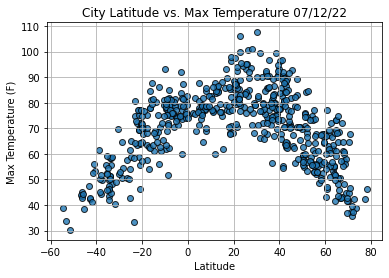

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

The balance of the scatter plots will share the same format. All we need to do is change the y-axis variable for each weather parameter. Let's create the scatter plots quickly by copying the code and changing the y-axis variable.

### Plot Latitude vs. Humidity

We can repurpose our code for the maximum temperature scatter plot and create a scatter plot for the latitude versus humidity.

In addition to changing the y-axis variable to "humidity," we need to change the title to "Humidity," and the y-axis label to "Humidity (%)."

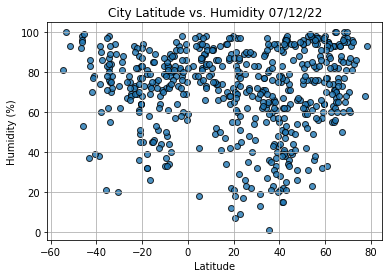

In [17]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

### Plot Latitude vs. Cloudiness

Let's refactor the code for our scatter plots by changing the y-axis variable to "cloudiness," the title to "Cloudiness (%)," and the y-axis label to "Cloudiness (%)."

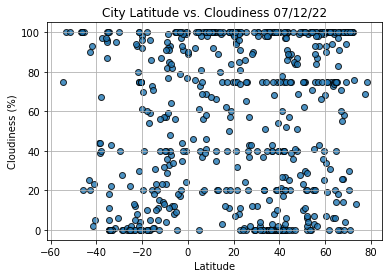

In [18]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

### Plot Latitude vs. Wind Speed

Now, we can create our last scatter plot! Let's repurpose the code we have been using and change the y-axis variable to "wind speed," the title to "Wind Speed," and the y-axis label to "Wind Speed (mph)."

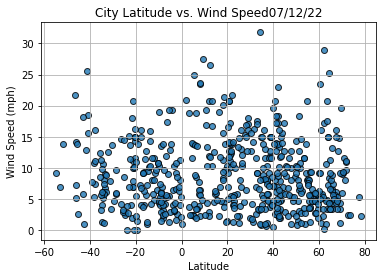

In [19]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed"+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()